## In the spirit of
https://xkcd.com/356/

In [33]:
import numpy as np
import pandas as pd
import altair as alt

In [45]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

### 1/x = 1/1 + 2/3 + 2/5 + 2/7 + ...

In [95]:
partial_series = [2/(2 + 1)]
partial_sum = [sum(partial_series)]
resistance = [1 / (1 + partial_sum[-1])]
convergence_array = [0]
iteration = [1]

while iteration[-1] < 50000000:
    iteration += [iteration[-1] + 1]
    partial_series += [2/(2 * iteration[-1] + 1)]
    partial_sum += [partial_sum[-1] + partial_series[-1]]
    resistance += [1 / (1 + partial_sum[-1])]
    convergence_array += [np.abs(resistance[-1] - resistance[-2])]
    #if convergence_array[-1] < 0.0000001:
    #    break

In [96]:
resistance[-1]

0.05350156047445599

In [97]:
len(partial_sum)
len(convergence_array)

50000000

In [98]:
range_indices = range(0, 
                      graph_data.shape[0],
                      graph_data.shape[0] // 1000)
iteration = [iteration[i] for i in range_indices]
partial_series = [partial_series[i] for i in range_indices]
partial_sum = [partial_sum[i] for i in range_indices]
resistance = [resistance[i] for i in range_indices]
convergence_array = [convergence_array[i] for i in range_indices]

In [99]:
graph_data = pd.DataFrame({'iteration': iteration,
                           'partial_series': partial_series,
                           'partial_sum': partial_sum,
                           'resistance': resistance,
                           'convergence_array': convergence_array})
graph_data['Runs'] = 'Runs'
graph_data = graph_data[['iteration', 'resistance', 'Runs']].copy()
#if graph_data.shape[0] > 1000:
#    graph_data = graph_data.iloc[range(0, 
#                                      graph_data.shape[0],
#                                      graph_data.shape[0] // 1000)].copy()
    
graph_data = pd.concat([graph_data, 
                       pd.DataFrame({'iteration': [0, iteration[-1]],
                                    'resistance': [resistance[-1] for i in range(2)],
                                    'Runs': ["Convergence" for i in range(2)]})])

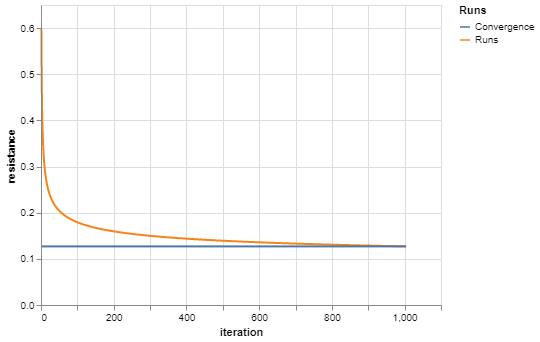

In [100]:
alt.Chart(graph_data).mark_line().encode(
    x='iteration',
    y='resistance',
    color = 'Runs'
)